In [1]:
# Import jupyter-notify for notification of cell completion
%load_ext jupyternotify

<IPython.core.display.Javascript object>

In [2]:
%%notify

import time
time.sleep(10)
print('Finished!')

Finished!


<IPython.core.display.Javascript object>

# Import libraries and dataset

In [3]:
# Import basic libraries
%matplotlib inline
import numpy as np
import pandas as pd
from datetime import datetime 
from datetime import timedelta
import csv 
import matplotlib.pyplot as plt
from datetime import date
from datetime import time
import matplotlib.dates as mdates
from matplotlib.transforms import Transform
from matplotlib.ticker import (
    AutoLocator, AutoMinorLocator)
import seaborn as sns
from matplotlib import pyplot
import PL2020 # formerly named dataset2020

# Data source: https://data.lacity.org/A-Well-Run-City/MyLA311-Service-Request-Data-2019/d4vt-q4t5
df_LA = PL2020.cleaned_df(r"MyLA311_Service_Request_Data_2019.csv") # Clean the imported data

C:\Users\hanaa\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3249: DtypeWarning: Columns (25) have mixed types. Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):
C:\Users\hanaa\P-ai\revised-counts-geo-data\PL2020.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hdf['ElapsedTime'] = df1 - df2
C:\Users\hanaa\P-ai\revised-counts-geo-data\PL2020.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hdf['ElapsedTime'] = hdf['ElapsedTime

# Council district data

In [4]:
# Merge CD and CDMember columns
cd_mem_df = df_LA["CD"].astype(str) + ' / ' + df_LA["CDMember"]
df_LA.insert(31, 'CD/Member', cd_mem_df)

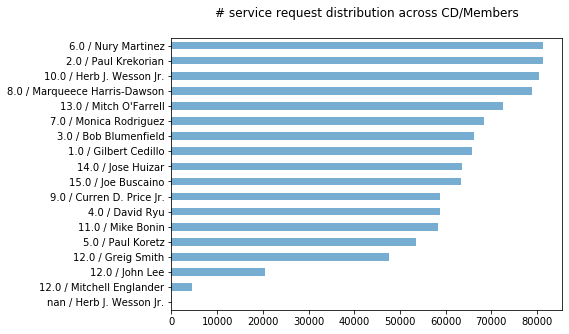

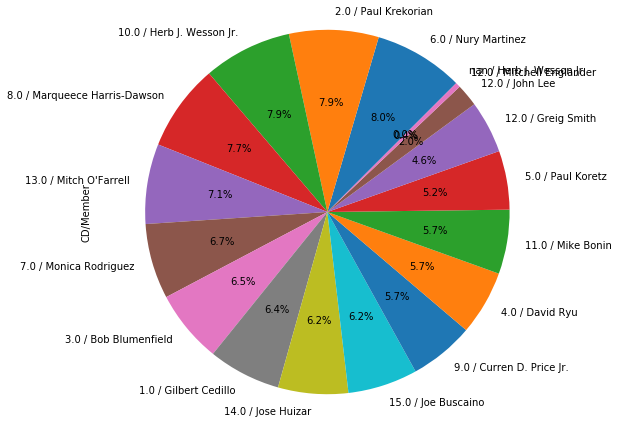

In [5]:
# Create dataframe for requests with elapsed days between 0-7 inclusive
df_week = df_LA[df_LA['ElapsedDays'] <= 7]

df_week['CD/Member'].value_counts().sort_values(ascending=True).plot(kind='barh',alpha=0.6,figsize=(7,5))
plt.title('# service request distribution across CD/Members\n')
plt.show()

df_week['CD/Member'].value_counts().plot(kind='pie',autopct='%1.1f%%', startangle=45, shadow=False, figsize = (8,6))
plt.axis('equal')
plt.tight_layout()
plt.show()

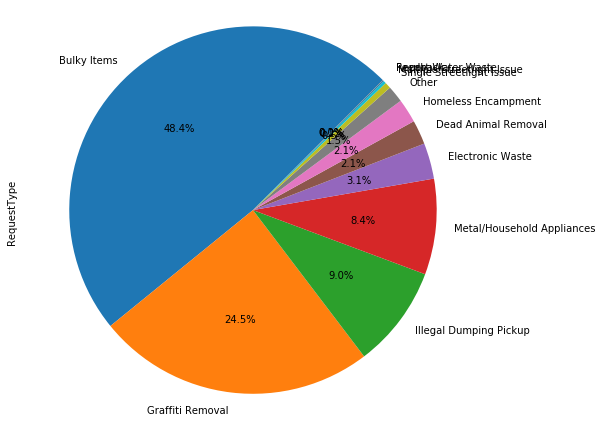

In [6]:
plt.close()

df_week['RequestType'].value_counts().plot(kind='pie',autopct='%1.1f%%', startangle=45, shadow=False, figsize = (8,6))
plt.axis('equal')
plt.tight_layout()
plt.show()

# Latitude/Longitude distributions

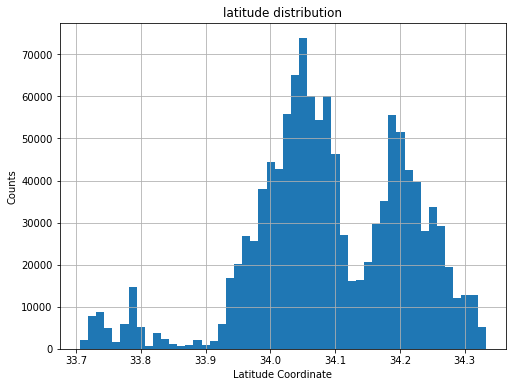

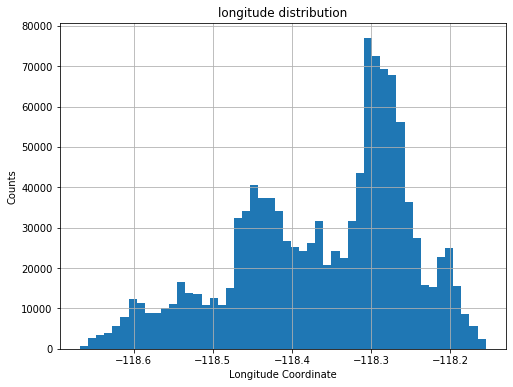

In [7]:
# Latitude coordinates plot
df_week["Latitude"].value_counts()
df_week["Latitude"].hist(bins=50, figsize=(8,6))
plt.xlabel('Latitude Coordinate')
plt.ylabel('Counts')
plt.title('latitude distribution')
plt.show()


# Longitude coordinates plot
df_week["Longitude"].value_counts()
df_week["Longitude"].hist(bins=50, figsize=(8,6))
plt.xlabel('Longitude Coordinate')
plt.ylabel('Counts')
plt.title('longitude distribution')
plt.show()

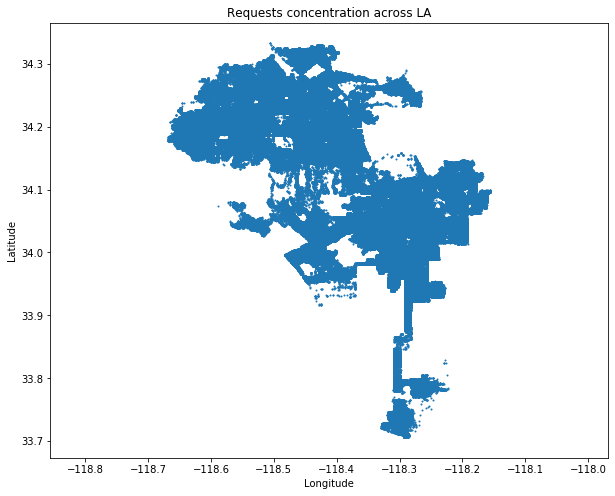

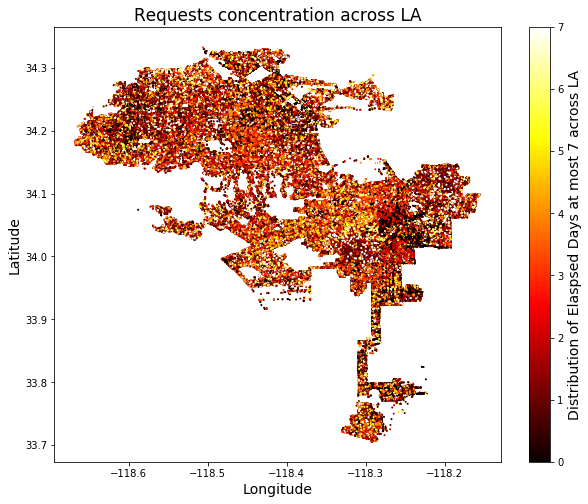

In [8]:
df_week[['Longitude', 'Latitude']].plot(kind='scatter',
    x='Longitude', y='Latitude', figsize=(10,8),title = 'Requests concentration across LA', s=1).axis('equal')

plt.figure(figsize = (10,8))
plt.scatter(df_week['Longitude'], df_week['Latitude'], c=df_week['ElapsedDays'], cmap = 'hot', s=1)
plt.colorbar().set_label('Distribution of Elaspsed Days at most 7 across LA', fontsize=14)
plt.xlabel('Longitude', fontsize=14)
plt.ylabel('Latitude', fontsize=14)
plt.title('Requests concentration across LA', fontsize=17)
plt.show()

In [11]:
# Find 4 most frequent location coordinates
print("Top 4 Lat/Long coordinates")
for i in range(0,4):
    max_loc = df_week['Location'].value_counts().idxmax()
    print(max_loc)
    df_week = df_week[df_week.Location != max_loc]

Top 4 Lat/Long coordinates
(34.0,-118.3)
(34.1,-118.3)
(34.2,-118.4)
(34.2,-118.5)
